In [1]:
from Assemblies.game import GameField
import numpy as np
from numpy import random
import time

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
b_points = np.array([1, 9/8, 8/7, 7/6, 6/5, 5/4, 9/7, 4/3, 7/5, 3/2, 8/5, 5/3, 7/4, 9/5, 2, 9/4, 7/3, 5/2, 8/3]) + 0.01

In [3]:
b_points[15]

2.26

In [3]:
burnin1=5000
evol1=500

In [4]:
def c_density(size=99, percentage=21, off_percentage=10, seed=1, burnin=10000, evol=100):
    random.seed(seed)
    
    instance = np.array(np.random.rand(size, size) <= 0.01 * off_percentage, dtype=int) * (-1)
    active_indexes=(-1-instance).nonzero()
    active_size=active_indexes[0].size
    active = np.array(np.random.rand(active_size) > 0.01 * percentage, dtype=int)
    instance[active_indexes]=np.copy(active)

    density = np.zeros((len(b_points),evol))
    
    for i in range(len(b_points)):
        game = GameField(size, b_points[i])
        game.field = np.copy(instance)
        game.evolveQ(burnin)
        for step in range(evol):
            game.evolveQ(1)
            density[i][step] = np.count_nonzero(np.equal(game.field,0)) / size**2
    return density

# off_percentage = 10

### cooperator percentage = 50

In [6]:
den10=np.zeros((10,len(b_points),evol1))
for i in range(10):
    den10[i]=c_density(off_percentage=10, percentage=50, burnin=burnin1, evol=evol1, seed=i)
    
aver10=np.zeros((len(b_points),evol1))

for i in range(len(b_points)):
    aver10[i]=np.mean(den10[:,i],axis=0)

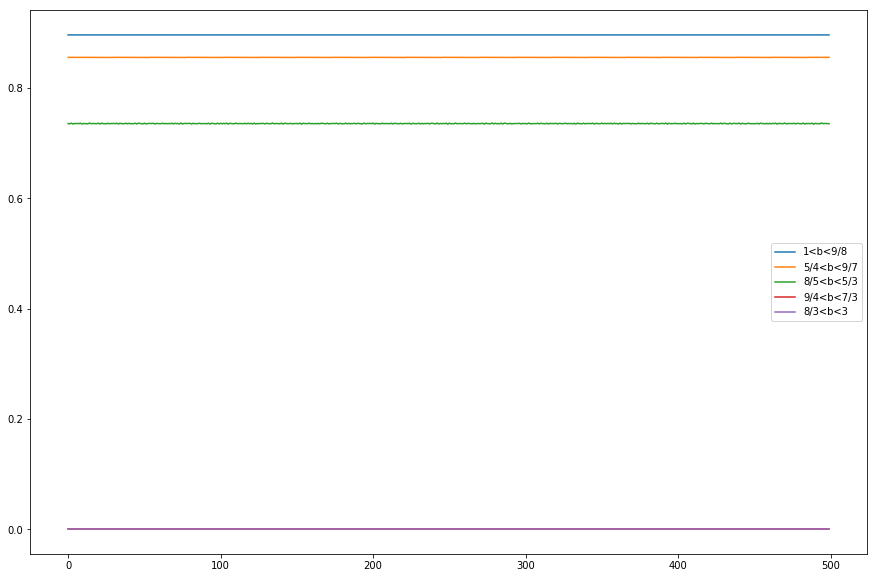

In [7]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(aver10[0])
ax.plot(aver10[5])
ax.plot(aver10[10])
ax.plot(aver10[15])
ax.plot(aver10[len(b_points)-1])
plt.legend(('1<b<9/8', '5/4<b<9/7', '8/5<b<5/3', '9/4<b<7/3', '8/3<b<3'))

# off_percentage = 10

### cooperator percentage = 50

In [8]:
den50=np.zeros((10,len(b_points),evol1))
for i in range(10):
    den50[i]=c_density(off_percentage=50, percentage=50, burnin=burnin1, evol=evol1, seed=i)
    
aver50=np.zeros((len(b_points),evol1))

for i in range(len(b_points)):
    aver50[i]=np.mean(den50[:,i],axis=0)

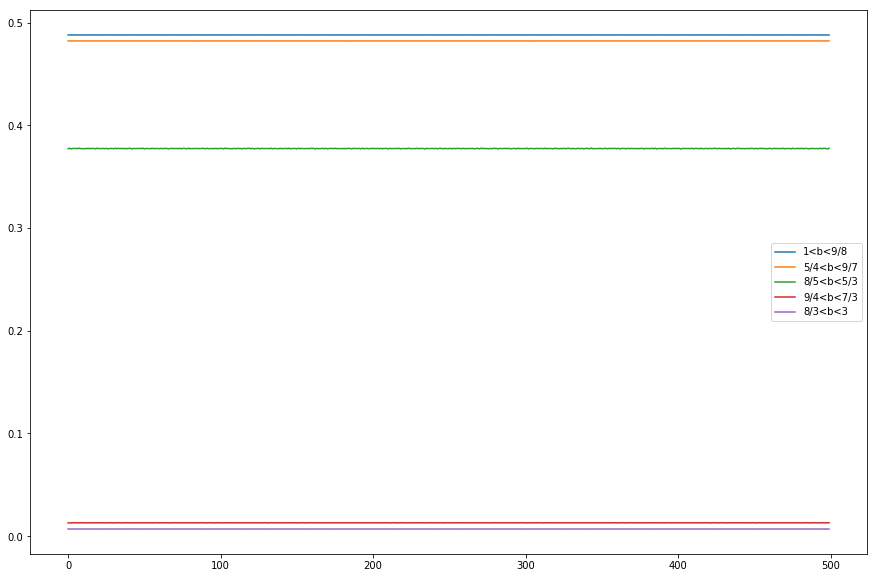

In [9]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(aver50[0])
ax.plot(aver50[5])
ax.plot(aver50[10])
ax.plot(aver50[15])
ax.plot(aver50[len(b_points)-1])
plt.legend(('1<b<9/8', '5/4<b<9/7', '8/5<b<5/3', '9/4<b<7/3', '8/3<b<3'))